In [37]:
import numpy as np 
import pandas as pd
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.utils import load_img, img_to_array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [38]:
for dirname, _, filenames in os.walk('./data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/archive.zip
./data/Evaluation_Set\Evaluation_Set\RFMiD_Validation_Labels.csv
./data/Evaluation_Set\Evaluation_Set\Validation\1.png
./data/Evaluation_Set\Evaluation_Set\Validation\10.png
./data/Evaluation_Set\Evaluation_Set\Validation\100.png
./data/Evaluation_Set\Evaluation_Set\Validation\101.png
./data/Evaluation_Set\Evaluation_Set\Validation\102.png
./data/Evaluation_Set\Evaluation_Set\Validation\103.png
./data/Evaluation_Set\Evaluation_Set\Validation\104.png
./data/Evaluation_Set\Evaluation_Set\Validation\105.png
./data/Evaluation_Set\Evaluation_Set\Validation\106.png
./data/Evaluation_Set\Evaluation_Set\Validation\107.png
./data/Evaluation_Set\Evaluation_Set\Validation\108.png
./data/Evaluation_Set\Evaluation_Set\Validation\109.png
./data/Evaluation_Set\Evaluation_Set\Validation\11.png
./data/Evaluation_Set\Evaluation_Set\Validation\110.png
./data/Evaluation_Set\Evaluation_Set\Validation\111.png
./data/Evaluation_Set\Evaluation_Set\Validation\112.png
./data/Evaluation_Set\Ev

In [39]:
# Définition des dossiers de données
train_dir = './data/Training_Set'
test_dir = './data/Test_Set'
eval_dir = './data/Evaluation_Set'

In [40]:
# Définition des limitations de la taille des images
img_width=300
img_height=450

# Entraînement

In [41]:
# Lecture des métadonnées pour obtention des valeurs des différents labels
df_train = pd.read_csv(
    "./data/Training_Set/Training_Set/RFMiD_Training_Labels.csv"
)

df_train.head(15)

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Les colonnes ID et Disease_Risk ne sont pas des labels pour l'entraînement. So drop them from the dataframe.
df_train = df_train.drop(["ID", "Disease_Risk"], axis=1)

In [43]:
def check_disease(df):
    disease_name, zeroCount, oneCount = [], [], []
    rowLen = len(df)
    for (
        column_name,
        column,
    ) in df.items():  # Utilisez df.items() au lieu de df.iteritems()
        disease_name.append(column_name)
        zeroCount.append(column.value_counts()[0])
    oneCount = [rowLen - x for x in zeroCount]

    return disease_name, zeroCount, oneCount


# Insert the image ID
def img_id(df, num):
    id_list = []
    for i in range(num):
        id_list.append(i + 1)
    df.insert(0, "ID", id_list)

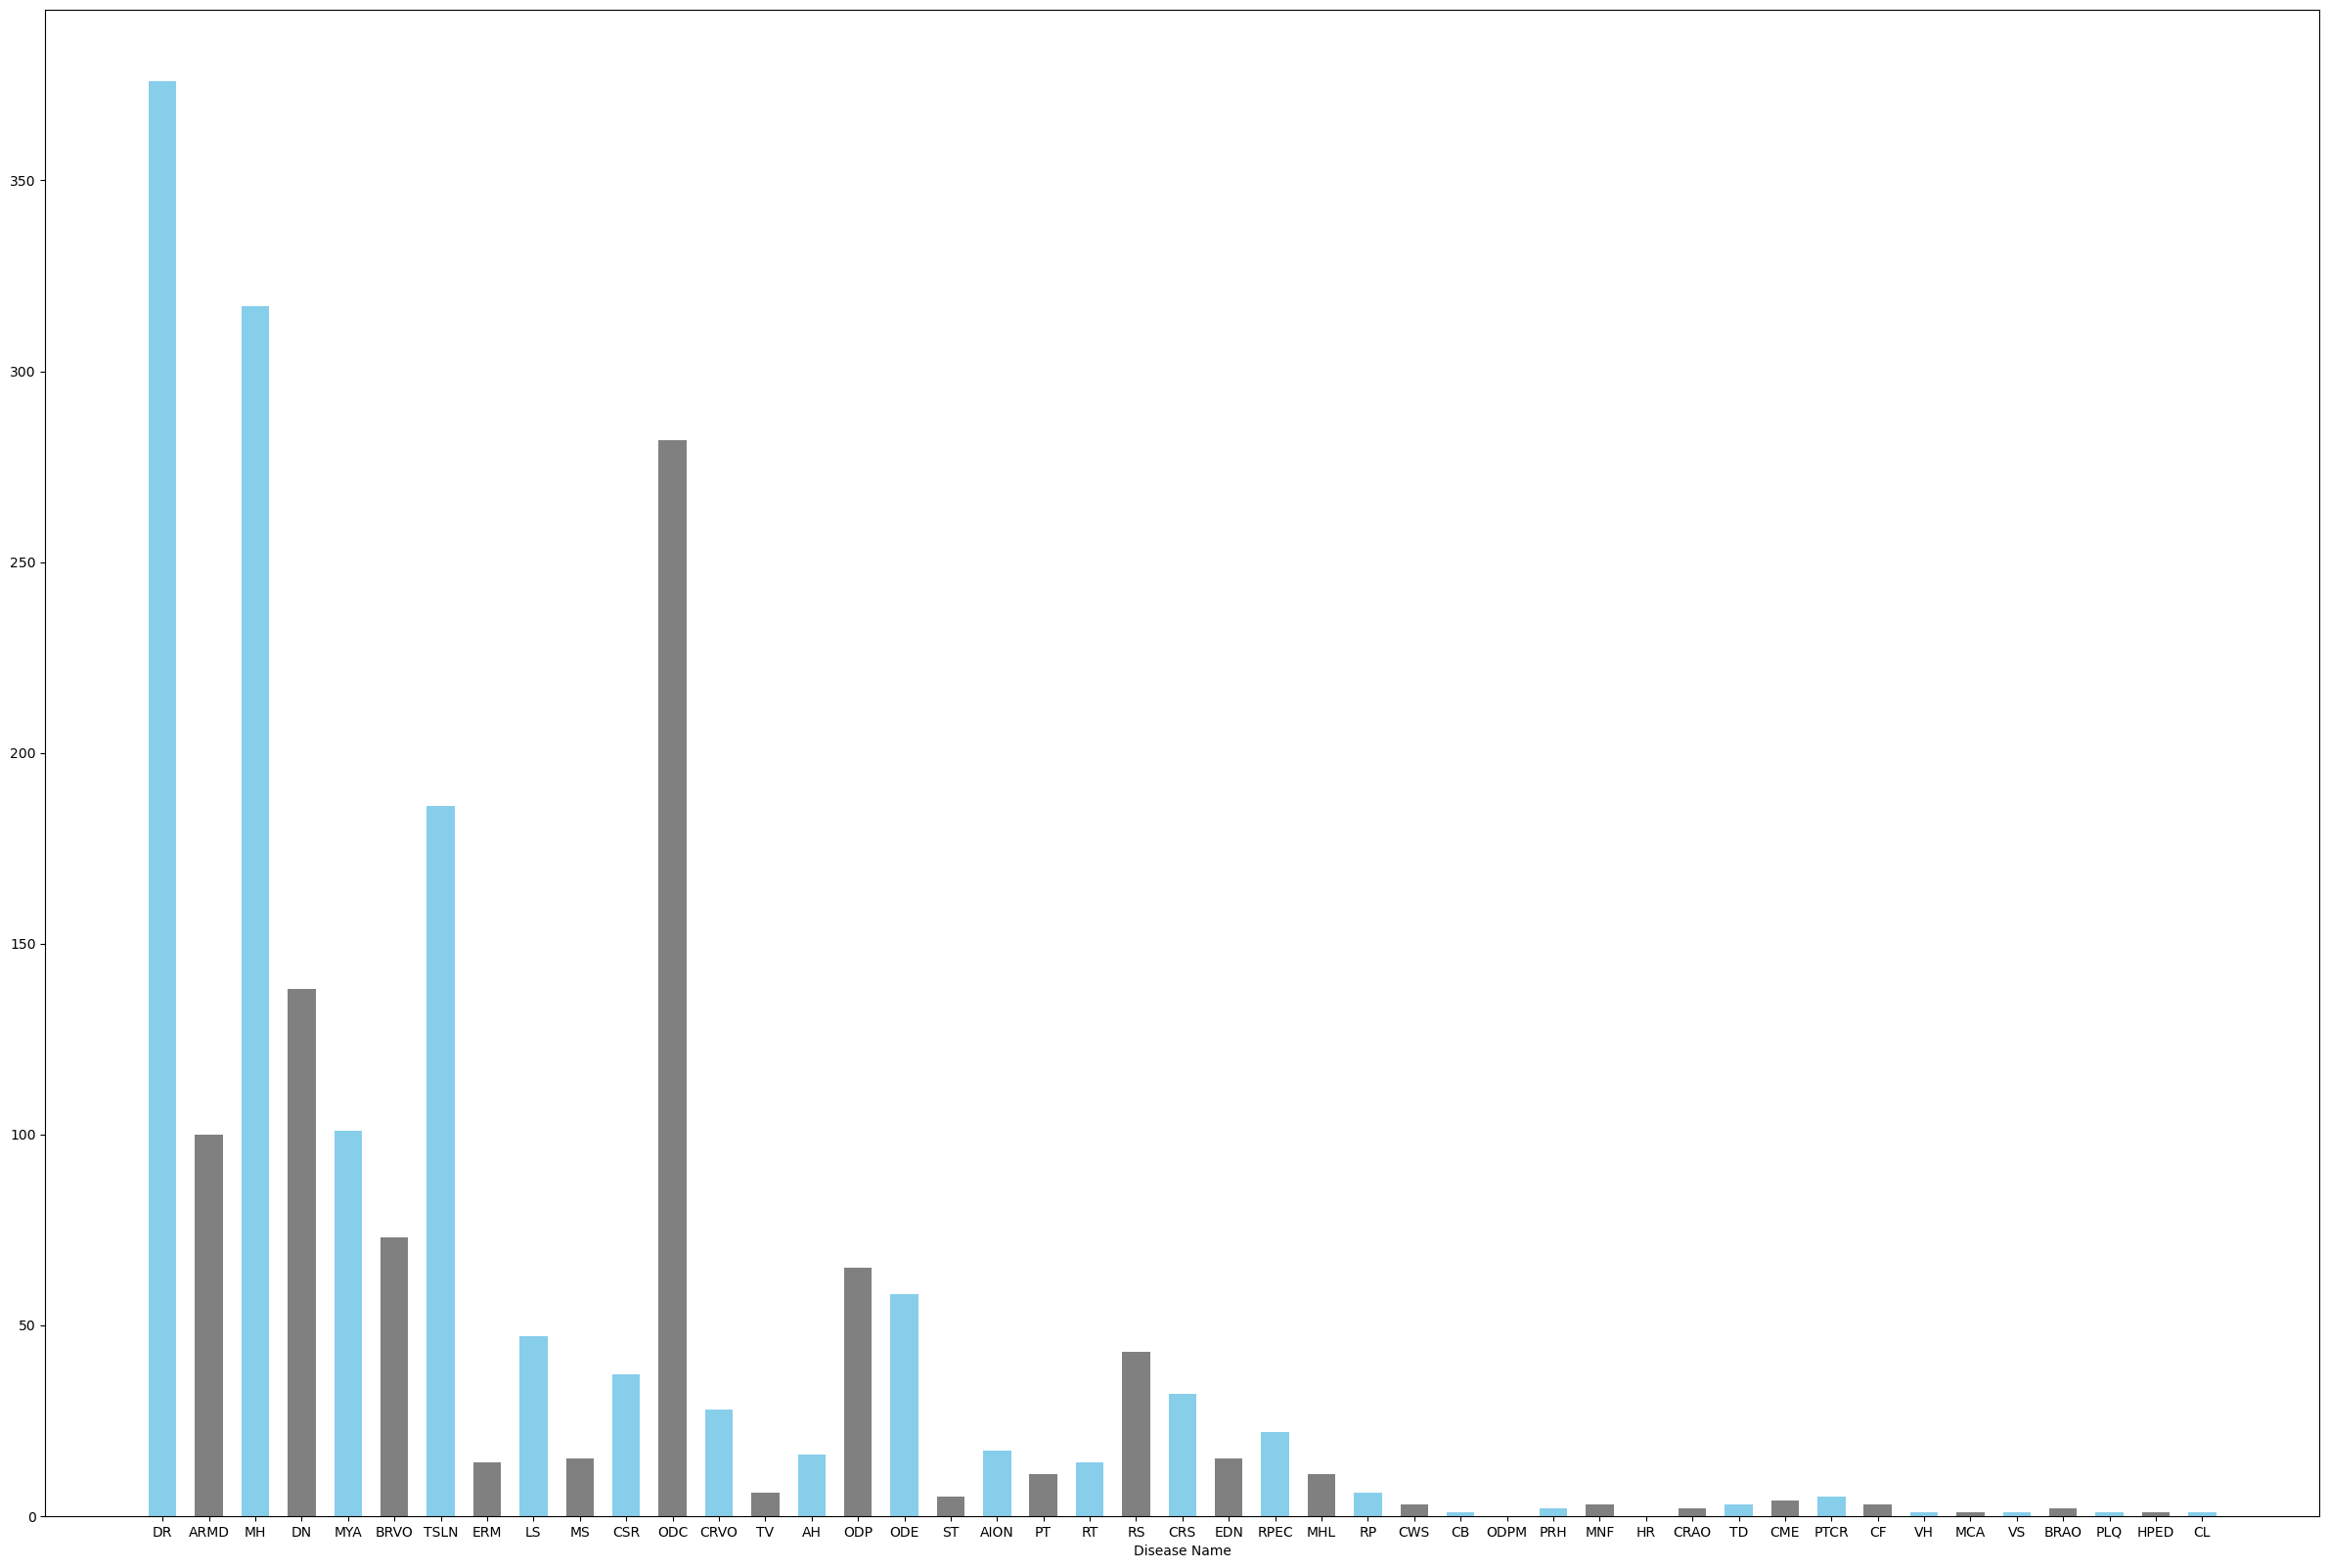

In [44]:
disease_name, zeroCount, oneCount = check_disease(df_train)

fig = plt.figure(figsize=(30, 20))
plt.bar(disease_name, oneCount, width=0.6, color=['skyblue', 'gray'])
plt.xlabel('Disease Name')
plt.show()

In [45]:
# Drops the columns which are below the 100
for i in range(45):
    if oneCount[i] <= 120:
        df_train = df_train.drop([disease_name[i]], axis=1)

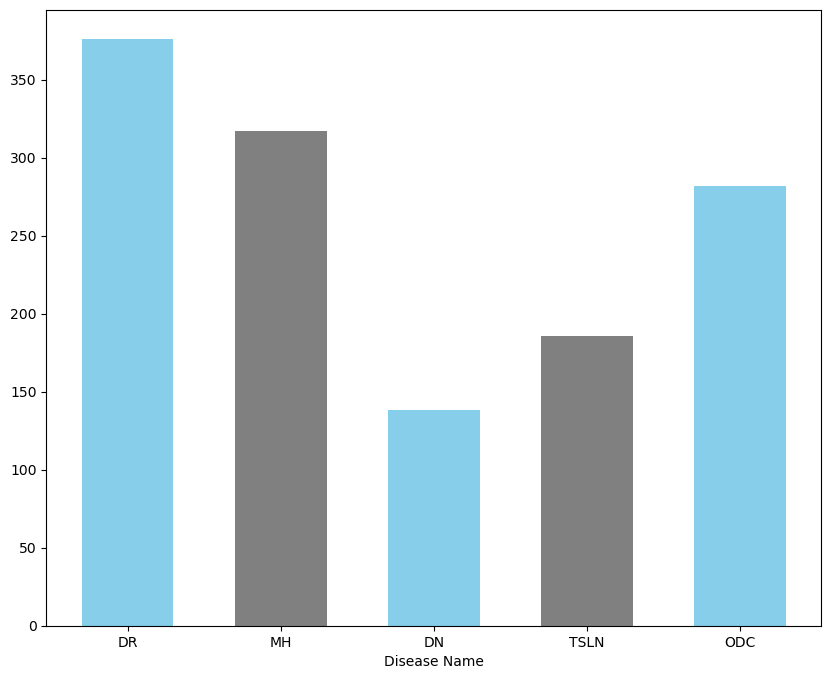

DR appear: 376
MH appear: 317
DN appear: 138
TSLN appear: 186
ODC appear: 282


In [46]:
disease_name, zeroCount, oneCount = check_disease(df_train)

fig = plt.figure(figsize=(10, 8))
plt.bar(disease_name, oneCount, width=0.6, color=['skyblue', 'gray'])
plt.xlabel('Disease Name')
plt.show()

for i in range(len(disease_name)):
    print(str(disease_name[i]) + ' appear: '+ str(oneCount[i]))
    
# Insert Image ID
img_id(df_train,len(df_train))

In [49]:
X_dataset = []  
print(tqdm(range(df_train.shape[0])))
for i in tqdm(range(df_train.shape[0])):
    img = load_img('./Data/Training_Set/Training_Set/Training/' +str(df_train['ID'][i])+'.png', target_size=(img_width,img_height,3))
    img = img_to_array(img)
    img = img/255.
    X_dataset.append(img)

  0%|          | 0/1920 [00:00<?, ?it/s]


  0%|          | 0/1920 [00:00<?, ?it/s]


100%|██████████| 1920/1920 [03:34<00:00,  8.97it/s]


In [50]:
X_train = np.array(X_dataset)

#ID are not labels to be trained. So drop them from the dataframe.
Y_train = np.array(df_train.drop(['ID'], axis=1))

# Test

In [52]:
#Now let us read metadata to get our Y values (multiple lables)
df_test = pd.read_csv('./data/Test_Set/Test_Set/RFMiD_Testing_Labels.csv')    
df_test

#ID and Disease_Risk are not labels to be trained. So drop them from the dataframe.
df_test = df_test.drop(['ID', 'Disease_Risk'], axis=1)

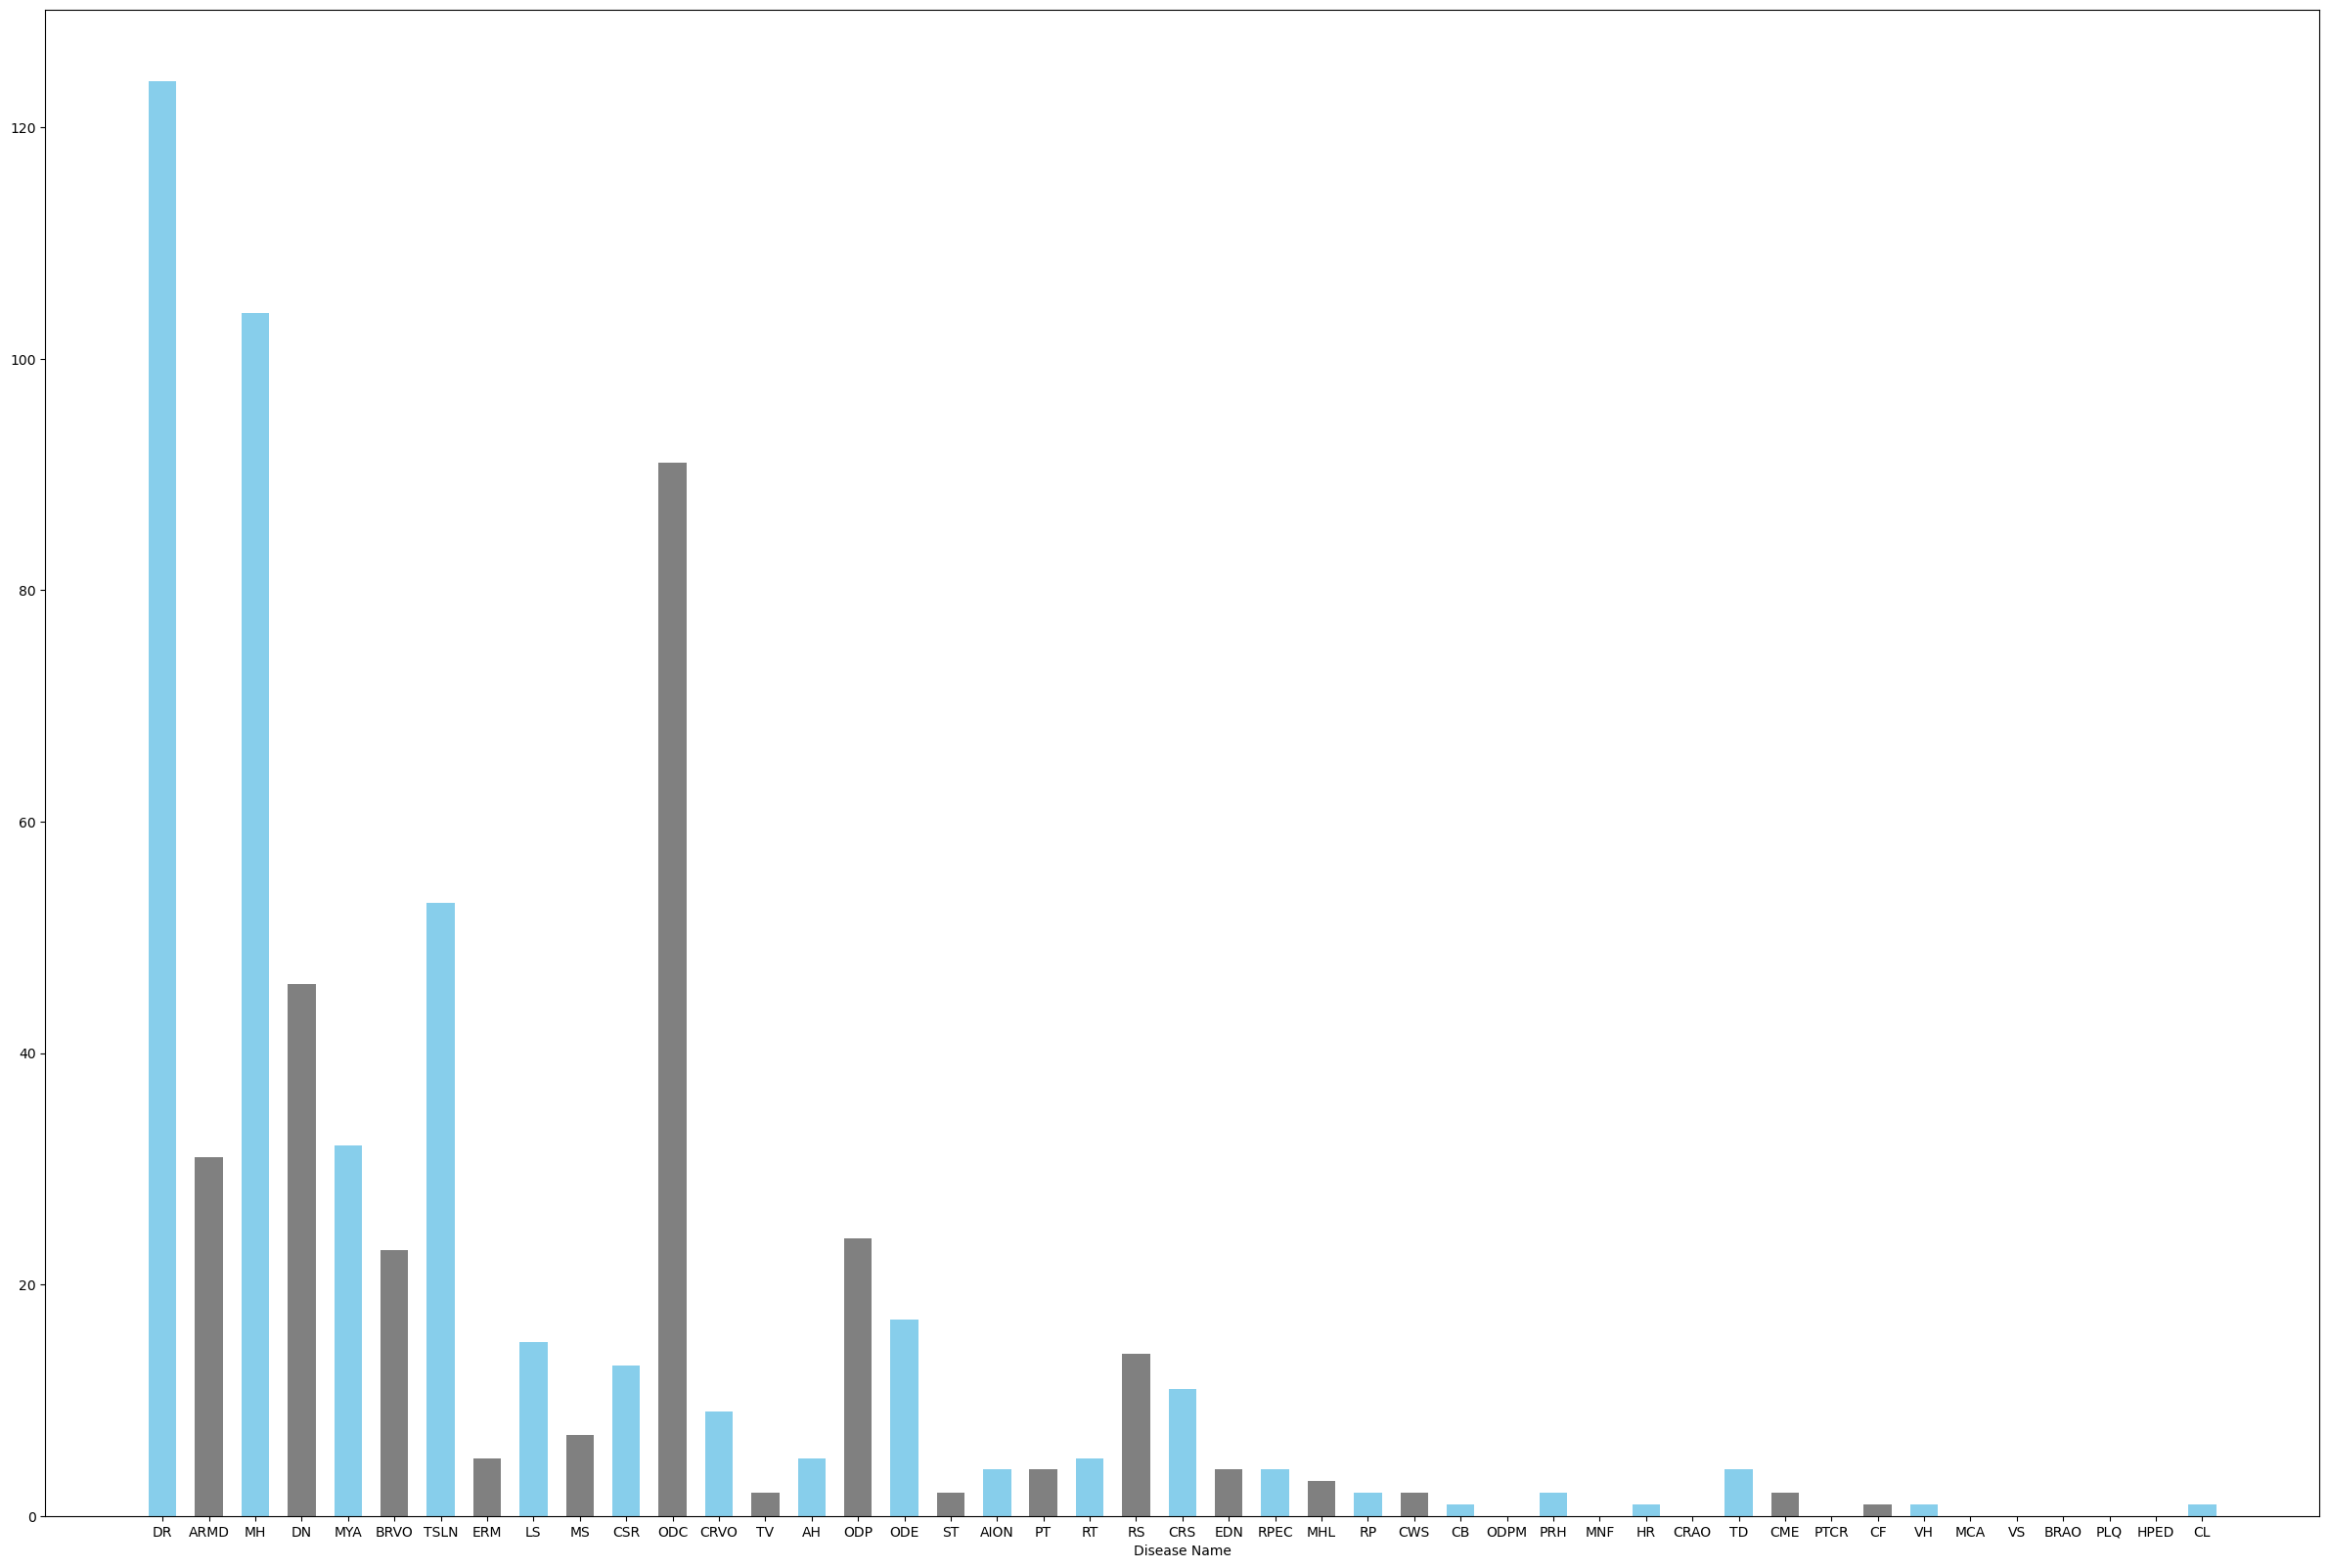

In [53]:
disease_name, zeroCount, oneCount = check_disease(df_test)

fig = plt.figure(figsize=(30, 20))
plt.bar(disease_name, oneCount, width=0.6, color=['skyblue', 'gray'])
plt.xlabel('Disease Name')
plt.show()

In [54]:
# Drops the columns which are below the 100
for i in range(45):
    if oneCount[i] <= 40:
        df_test = df_test.drop([disease_name[i]], axis=1)


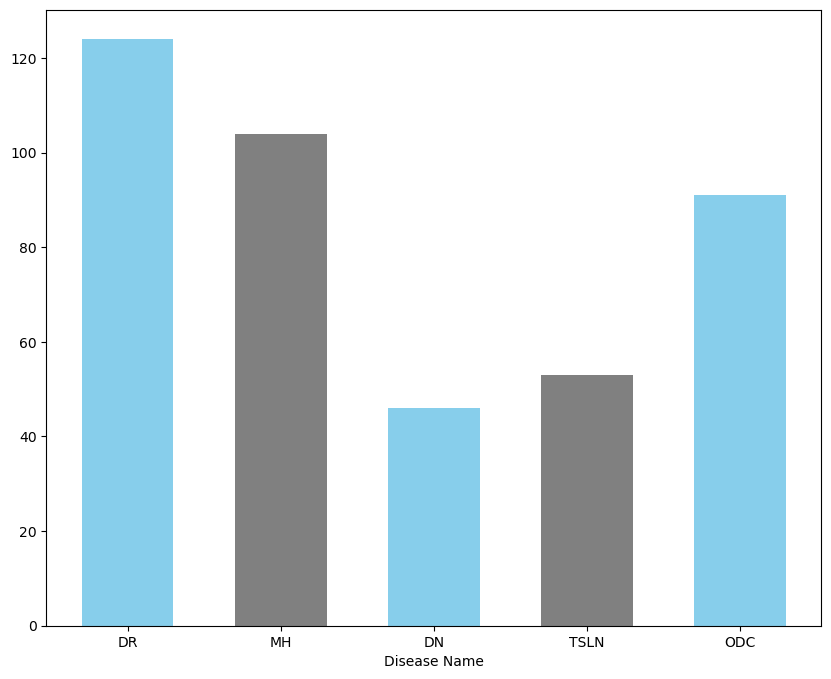

DR appear: 124
MH appear: 104
DN appear: 46
TSLN appear: 53
ODC appear: 91


In [55]:
disease_name, zeroCount, oneCount = check_disease(df_test)

fig = plt.figure(figsize=(10, 8))
plt.bar(disease_name, oneCount, width=0.6, color=['skyblue', 'gray'])
plt.xlabel('Disease Name')
plt.show()

for i in range(len(disease_name)):
    print(str(disease_name[i]) + ' appear: '+ str(oneCount[i]))
    
# Insert Image ID
img_id(df_test,len(df_test))

In [56]:
X_dataset = []  
print(tqdm(range(df_test.shape[0])))
for i in tqdm(range(df_test.shape[0])):
    img = load_img('./Data/Training_Set/Training_Set/Training/' +str(df_train['ID'][i])+'.png', target_size=(img_width,img_height,3))
    img = img_to_array(img)
    img = img/255.
    X_dataset.append(img)

  0%|          | 0/640 [00:00<?, ?it/s]


  0%|          | 0/640 [00:00<?, ?it/s]


100%|██████████| 640/640 [00:35<00:00, 18.19it/s]


In [57]:
X_test = np.array(X_dataset)

#ID are not labels to be trained. So drop them from the dataframe.
Y_test = np.array(df_test.drop(['ID'], axis=1))

# Deep Learning

In [58]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(5, activation='softmax'))  # Adjust num_classes to match your problem

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

94765736/94765736 [==============================] - 10s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 25,691,013
Trainable params: 2,103,301
Non-trainable params: 23,587,712
_________________________________________________________________


In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 25,691,013
Trainable params: 2,103,301
Non-trainable params: 23,587,712
_________________________________________________________________


In [60]:
history = model.fit(X_train, Y_train, epochs=1000, validation_data=(X_test, Y_test), batch_size=64)

Epoch 1/1000
30/30 [==============================] - 299s 10s/step - loss: 1.2750 - accuracy: 0.2958 - val_loss: 1.1762 - val_accuracy: 0.1562
Epoch 2/1000
30/30 [==============================] - 433s 15s/step - loss: 1.1632 - accuracy: 0.3568 - val_loss: 1.1395 - val_accuracy: 0.1562
Epoch 3/1000
30/30 [==============================] - 241s 8s/step - loss: 1.2271 - accuracy: 0.2349 - val_loss: 1.1893 - val_accuracy: 0.0469
Epoch 4/1000
30/30 [==============================] - 451s 15s/step - loss: 1.6153 - accuracy: 0.2422 - val_loss: 1.7472 - val_accuracy: 0.1562
Epoch 5/1000
30/30 [==============================] - 311s 10s/step - loss: 4.4721 - accuracy: 0.2719 - val_loss: 5.7373 - val_accuracy: 0.0453
Epoch 6/1000
30/30 [==============================] - 224s 8s/step - loss: 7.2309 - accuracy: 0.2703 - val_loss: 5.5872 - val_accuracy: 0.1031
Epoch 7/1000
30/30 [==============================] - 225s 8s/step - loss: 5.6034 - accuracy: 0.2281 - val_loss: 12.4564 - val_accuracy: 0

KeyboardInterrupt: 

In [ ]:
# plot the training and validation accuracy and loss at each epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "y", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


acc = history.history["val_accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "y", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Validate on an image
img = load_img(
    "./data/Test_Set/Test_Set/Test/2.png",
    target_size=(img_width, img_height, 3),
)

img = img_to_array(img)
img = img / 255.0
plt.imshow(img)
img = np.expand_dims(img, axis=0)
classes = np.array(disease_name)
proba = model.predict(img)  # Get probabilities for each class

sorted_categories = np.argsort(proba[0])[:-6:-1]

# Print classes and corresponding probabilities
for i in range(len(classes)):
    print(
        "{}".format(classes[sorted_categories[i]])
        + " ({:.3})".format(proba[0][sorted_categories[i]])
    )

In [ ]:
#Validate on an image
from keras.preprocessing import image
from tensorflow import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# model = keras.models.load_model('driver_drowsiness_detection_model_old_dataset.h5')
# model = keras.models.load_model('eye_close_classifier.h5')

# img_width=256
# img_height=256

new_path = './data/Test_Set/Test_Set/Test/229.png'
image_result=Image.open(new_path)


def data_resizing_process(dirs):
    datas = image.load_img(dirs, target_size = (img_width, img_height))
    res = image.img_to_array(datas)
    res = np.expand_dims(res, axis = 0)
    res /= 255
    return res

# img = image.load_img(new_path, target_size=(img_width,img_height,3))
# img = image.img_to_array(img)
# img = np.expand_dims(img, axis=0)
# img = img/255.

img = data_resizing_process(new_path)
result = model.predict(img)
# print(np.argmax(result))

Categories=disease_name
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()

In [ ]:
_, acc = model.evaluate(X_test, Y_test)
print("Accuracy = ", (acc * 100.0), "%")

In [ ]:
model.save('multi_CNN.h5')